# Домашнее задание 1
### Хмелевской Егор 

Смоделируем случайные блуждания, что обеспечит иллюстративное применение использования операций с массивом. Рассмотрим случайное блуждание в 1000 шагов, начинающееся с 0 с шагом 1 и -1, с равной вероятностью (пояснение: длинна равна 1000). 

Найти:
1. Минимальное и максимальное значение по траектории
2. Найти первый момент времени, когда на прогулке было сделано более 10 шагов в одну сторону
3. Найти максимальное количество шагов в одну сторону

Каждое решение сопроводить сопроводить визуализацией.

In [1]:
# Здесь укажите необходимые вам библиотеки
import numpy as np
import matplotlib.pyplot as plt

### 1. Минимальное и максимальное значение по траектории

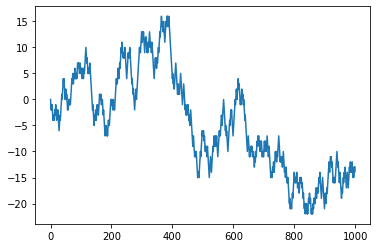

In [2]:
# Здесь нужно написать код случайного блужания
walk = np.hstack((np.array([0]), np.random.choice([-1,1], 999)))

locate = walk.cumsum()
place = plt.figure()
vis_walk = place.add_subplot(1, 1, 1)
vis_walk.plot(locate)

максимальное значение по траектории: 16
минимальное значение по траектории: -22


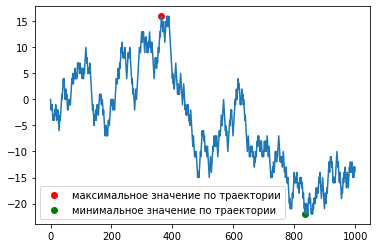

In [3]:
# здесь ваше решение и визуализация (все в одном блоке)
max_point = max(locate)
min_point = min(locate)
vis_walk.scatter(np.nanargmax(locate),max_point, c = 'r', label = 'максимальное значение по траектории')
vis_walk.scatter(np.nanargmin(locate),min_point, c = 'g', label = 'минимальное значение по траектории')
vis_walk.legend()
print('максимальное значение по траектории:', max_point)
print('минимальное значение по траектории:', min_point)
place

### 2. Найдем первый момент времени, когда на прогулке было сделано более 10 шагов в одну сторону

более 10 шагов в одну сторону было сделано начиная с шага: 389


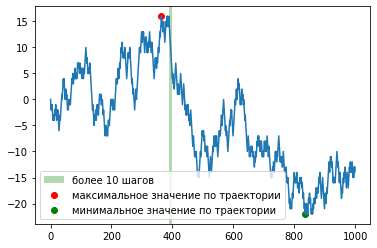

In [4]:
# здесь ваше решение и визуализация (все в одном блоке)
begin_step = None
for i in range(len(walk)-10):
    if int(abs(sum(walk[i:i+11]))) == 11:
        begin_step = i
        print('более 10 шагов в одну сторону было сделано начиная с шага:', begin_step)
        vis_walk.axvspan(begin_step,begin_step+11, alpha = 0.3, facecolor='g', label = 'более 10 шагов')
        vis_walk.legend()
        break 
if begin_step is None:
    print('более 10 шагов в одну сторону за время прогулки сделано не было')
place

### 3. Найдем максимальное количество шагов в одну сторону

максимальное количество шагов в одну сторону: 12; было сделано начиная с шага: 389
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


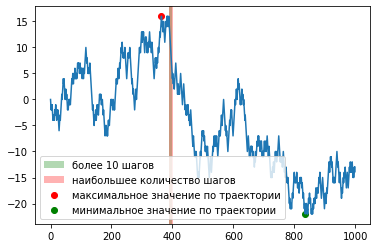

In [5]:
# здесь ваше решение и визуализация (все в одном блоке)
cur_max = 1
max_steps = 1
step = 1
for i in range(1, len(walk)-1):
    if walk[i] == walk[i+1]:
        cur_max +=1
    else:
        if cur_max > max_steps:
            max_steps = cur_max
            step = i+1-max_steps
        cur_max = 1 
if cur_max > max_steps:
    max_steps = cur_max
    step = len(walk)-max_steps

print('максимальное количество шагов в одну сторону: ', max_steps,'; было сделано начиная с шага: ', step, sep = '')
vis_walk.axvspan(step,step + max_steps ,alpha = 0.3, facecolor='r', label = 'наибольшее количество шагов')
vis_walk.legend()
print(walk[step:step + max_steps])
place